In [1]:
#importing import libraries
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('C:\\Users\sojore\Documents\heart failure dataset\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#exploring the dataset
df.groupby('age')['age'].agg('count').sort_values(ascending=False).head()

age
60.0    33
50.0    27
65.0    26
70.0    25
45.0    19
Name: age, dtype: int64

In [4]:
#handling any missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Text(0, 0.5, 'DEATH_EVENT')

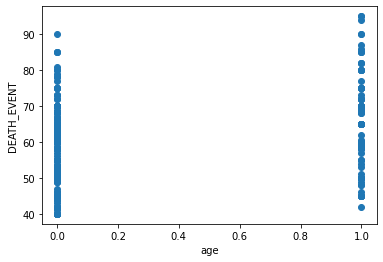

In [5]:
#the dataset has no nan values,so we can plot some plot to visualize the dataset
plt.scatter(df.DEATH_EVENT,df.age)
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Text(0, 0.5, 'DEATH_EVENT')

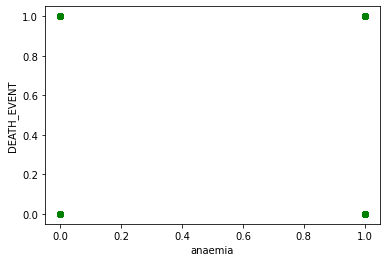

In [7]:
plt.scatter(df.DEATH_EVENT,df.anaemia,color='g')
plt.xlabel('anaemia')
plt.ylabel('DEATH_EVENT')

Text(0, 0.5, 'DEATH_EVENT')

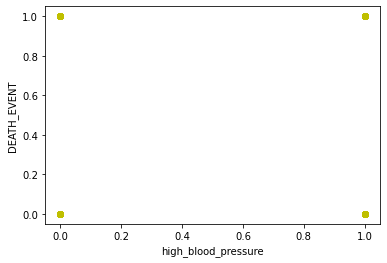

In [8]:
plt.scatter(df.DEATH_EVENT,df.high_blood_pressure,color='y')
plt.xlabel('high_blood_pressure')
plt.ylabel('DEATH_EVENT')

Text(0, 0.5, 'DEATH_EVENT')

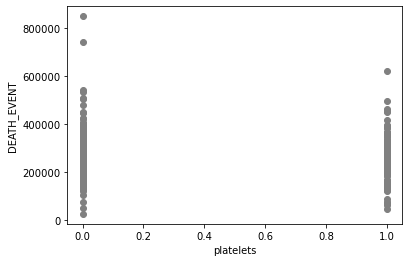

In [9]:
plt.scatter(df.DEATH_EVENT,df.platelets,color='grey')
plt.xlabel('platelets')
plt.ylabel('DEATH_EVENT')

Text(0, 0.5, 'DEATH_EVENT')

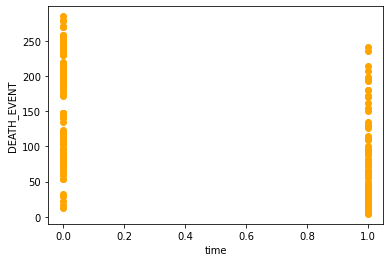

In [10]:
plt.scatter(df.DEATH_EVENT,df.time,color='orange')
plt.xlabel('time')
plt.ylabel('DEATH_EVENT')

(array([37., 37., 39., 55., 46., 40., 19., 12.,  8.,  6.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

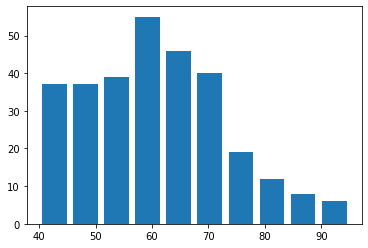

In [11]:
#lets plot a histogram to see how it looks like
plt.hist(df.age,rwidth=0.8)

In [12]:
#next we handle outliers
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [13]:
#creating new columns to help in outlier detection and removal
df['time2']=df.time**2
df['creatinine_phosphokinase2']=df.creatinine_phosphokinase**2
df['serum_creatinine2']=df.serum_creatinine**2
df['serum_sodium2']=df.serum_sodium**2
df['ejection_fraction2']=df.ejection_fraction**2

In [14]:
df.dtypes

age                          float64
anaemia                        int64
creatinine_phosphokinase       int64
diabetes                       int64
ejection_fraction              int64
high_blood_pressure            int64
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                            int64
smoking                        int64
time                           int64
DEATH_EVENT                    int64
time2                          int64
creatinine_phosphokinase2      int64
serum_creatinine2            float64
serum_sodium2                  int64
ejection_fraction2             int64
dtype: object

In [15]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,time2,creatinine_phosphokinase2,serum_creatinine2,serum_sodium2,ejection_fraction2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,16,338724,3.61,16900,400
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,36,61795321,1.21,18496,1444
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,49,21316,1.69,16641,400
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,49,12321,3.61,18769,400
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,64,25600,7.29,13456,400


In [16]:
df.shape

(299, 18)

In [17]:
#we now gonna use the IQR to detect and remove some of outliers
Q1=df.platelets.quantile(0.25)
Q3=df.platelets.quantile(0.75)
Q1,Q3

(212500.0, 303500.0)

In [18]:
IQR=Q3-Q1
ll1=Q1-IQR*1.5
ul1=Q3+IQR*1.5
ll1,ul1

(76000.0, 440000.0)

In [19]:
df[(df.platelets<ll1) | (df.platelets>ul1)]
df1=df[(df.platelets>ll1) & (df.platelets<ul1)]
df1.shape

(278, 18)

In [20]:
ll2=df1.time2.quantile(0.01)
ul2=df1.time2.quantile(0.98)
ll2,ul2

(49.0, 66564.0)

In [21]:
df1[(df1.time2<ll2) | (df1.time2>ul2)]
df2=df1[(df1.time2>ll2) & (df1.time2<ul2)]
df2.shape

(267, 18)

In [22]:
df2.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,time2,creatinine_phosphokinase2,serum_creatinine2,serum_sodium2,ejection_fraction2
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,64,25600,7.29,13456,400
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,64,2209,4.41,17424,1600


In [23]:
ll3=df2.creatinine_phosphokinase2.quantile(0.01)
ul3=df2.creatinine_phosphokinase2.quantile(0.98)
ll3,ul3

(2209.0, 13183100.800000055)

In [24]:
df2[(df2.creatinine_phosphokinase2<ll3) | (df2.creatinine_phosphokinase2>ul3)]
df3=df2[(df2.creatinine_phosphokinase2>ll3) & (df2.creatinine_phosphokinase2<ul3)]
df3.shape

(256, 18)

In [25]:
ll4=df3.serum_creatinine2.quantile(0.01)
ul4=df3.serum_creatinine2.quantile(0.98)
ll4,ul4

(0.36, 19.024000000000022)

In [26]:
df3[(df3.serum_creatinine2<ll4) | (df3.serum_creatinine2>ul4)]
df4=df3[(df3.serum_creatinine2>ll4) & (df3.serum_creatinine2<ul4)]
df4.shape

(246, 18)

In [27]:
df4.sample(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,time2,creatinine_phosphokinase2,serum_creatinine2,serum_sodium2,ejection_fraction2
229,72.000,0,211,0,25,0,274000.0,1.2,134,0,0,207,0,42849,44521,1.44,17956,625
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172,0,29584,22801,1.00,18496,1600


In [28]:
ll5=df4.serum_sodium2.quantile(0.01)
ul5=df4.serum_sodium2.quantile(0.98)
ll5,ul5

(14971.75, 21025.0)

In [29]:
df4[(df4.serum_sodium2<ll5) | (df4.serum_sodium2>ul5)]
df5=df4[(df4.serum_sodium2>ll5) & (df4.serum_sodium2<ul5)]
df5.shape

(233, 18)

In [30]:
ll6=df5.ejection_fraction2.quantile(0.01)
ul6=df5.ejection_fraction2.quantile(0.98)
ll6,ul6

(245.47999999999996, 3600.0)

In [31]:
df5[(df5.ejection_fraction2<ll6) | (df5.ejection_fraction2>ul6)]
df6=df5[(df5.ejection_fraction2>=ll6) & (df5.ejection_fraction2<=ul6)]
df6.shape

(227, 18)

In [32]:
#droping some unneccesary columns
df7=df6.drop(['time2','creatinine_phosphokinase2','serum_creatinine2','serum_sodium2','ejection_fraction2'],axis='columns')
df7.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10,1
12,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11,1
13,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11,1
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0


In [33]:
df7.time.unique()

array([ 10,  11,  12,  14,  15,  16,  20,  22,  23,  24,  26,  27,  28,
        29,  30,  31,  32,  33,  35,  38,  42,  43,  44,  45,  54,  55,
        59,  60,  64,  65,  66,  68,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,
        96,  97, 100, 104, 106, 107, 108, 109, 110, 111, 112, 113, 115,
       118, 119, 120, 121, 129, 130, 134, 140, 145, 146, 147, 148, 150,
       154, 162, 170, 171, 172, 174, 175, 180, 185, 186, 187, 188, 193,
       194, 195, 196, 197, 198, 201, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 220, 230, 231, 233, 235, 237, 240, 241,
       244, 245, 246, 247, 250, 256, 257], dtype=int64)

In [34]:
##i am gonna drop this time column too,it will count less in my model training
df8=df7.drop('time',axis=1)
df8.sample(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.00,0.90,144,0,0,0
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,0
227,55.0,1,2794,0,35,1,141000.00,1.00,140,1,0,0


(array([ 8., 11., 21., 40., 56., 34., 28., 13., 10.,  6.]),
 array([105000., 137200., 169400., 201600., 233800., 266000., 298200.,
        330400., 362600., 394800., 427000.]),
 <BarContainer object of 10 artists>)

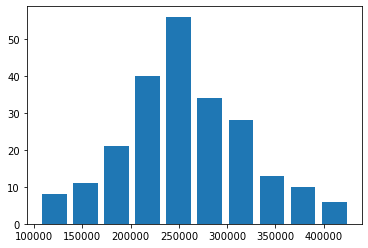

In [35]:
plt.hist(df8.platelets,rwidth=0.8)

(array([ 2.,  2.,  3.,  9., 17., 44., 63., 30., 41., 16.]),
 array([124., 126., 128., 130., 132., 134., 136., 138., 140., 142., 144.]),
 <BarContainer object of 10 artists>)

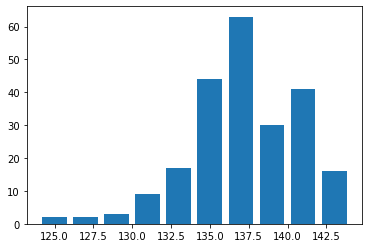

In [36]:
plt.hist(df8.serum_sodium,rwidth=0.8)

(array([132.,  49.,  17.,  10.,   5.,   3.,   4.,   1.,   3.,   3.]),
 array([  52. ,  326.2,  600.4,  874.6, 1148.8, 1423. , 1697.2, 1971.4,
        2245.6, 2519.8, 2794. ]),
 <BarContainer object of 10 artists>)

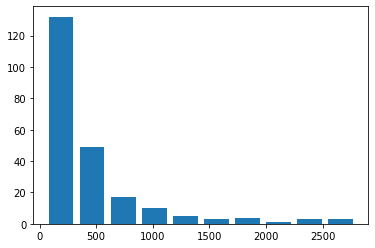

In [37]:
plt.hist(df8.creatinine_phosphokinase,rwidth=0.8)

(array([13., 32.,  0., 28., 67., 32., 15., 15.,  1., 24.]),
 array([17. , 21.3, 25.6, 29.9, 34.2, 38.5, 42.8, 47.1, 51.4, 55.7, 60. ]),
 <BarContainer object of 10 artists>)

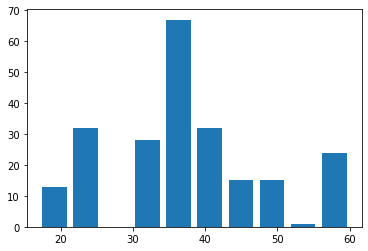

In [38]:
plt.hist(df8.ejection_fraction,rwidth=0.8)

(array([ 8., 11., 21., 40., 56., 34., 28., 13., 10.,  6.]),
 array([105000., 137200., 169400., 201600., 233800., 266000., 298200.,
        330400., 362600., 394800., 427000.]),
 <BarContainer object of 10 artists>)

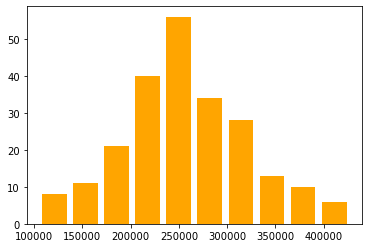

In [39]:
plt.hist(df8.platelets,rwidth=0.8,color='orange')

In [40]:
#my histograms are kinda having a normal distribution pattern which is pretty cool
#next...preparing the training and testing dataset

In [41]:
df8.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,1
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,1
12,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,1
13,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,1
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,0


In [42]:
X=df8.drop('DEATH_EVENT',axis='columns')
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,1
12,45.0,1,981,0,30,0,136000.0,1.1,137,1,0
13,50.0,1,168,0,38,1,276000.0,1.1,137,1,0
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0


In [43]:
y=df8.DEATH_EVENT
y.head()

10    1
11    1
12    1
13    1
14    0
Name: DEATH_EVENT, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [45]:
len(X_train)

181

In [46]:
len(X_test)

46

In [47]:
#using gridsearchcv to determine the best algorithm to train my model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [48]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [49]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,best_score,best_params
0,linear_regression,0.069670,{'normalize': True}
1,lasso,-0.035525,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,-0.565392,"{'criterion': 'mse', 'splitter': 'best'}"
3,svm,0.756757,"{'C': 1, 'kernel': 'linear'}"
4,random_forest,0.713514,{}
5,logistic_regression,0.805405,{}


In [50]:
#from the above its clear that logistic_regression is the algorithm to go with
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [51]:
y_predicted=model1.predict(X_test)
y_predicted[:10]

array([ 0.4508146 ,  0.34337408,  0.21124427,  0.6188548 ,  0.17661234,
        0.25494182, -0.10073305,  0.17666058,  0.29253705, -0.05580819])

In [62]:
y_test[:10]

121    0
42     1
108    0
98     0
111    0
196    0
259    0
90     0
99     0
284    0
Name: DEATH_EVENT, dtype: int64

In [52]:
##import important libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [53]:
X_train.shape

(181, 11)

In [54]:
X_test.shape

(46, 11)

Using Artificial NEural NEtwork to create my model

In [55]:
##using artificial neural network to do e above tasks
model=keras.Sequential([
    keras.layers.Dense(11,input_dim=11,activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
23/23 [==============================] - 7s 10ms/step - loss: 14379.8955 - accuracy: 0.7127
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 4190.4395 - accuracy: 0.7072
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 731.6199 - accuracy: 0.4751
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 71.9507 - accuracy: 0.6298
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 225.0449 - accuracy: 0.5746
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 79.4950 - accuracy: 0.6188
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 87.5092 - accuracy: 0.6022
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 113.5903 - accuracy: 0.6243
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 104.4117 - accuracy: 0.5912
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 107.4649 - accur

23/23 [==============================] - 0s 4ms/step - loss: 68.6472 - accuracy: 0.6077
Epoch 81/100
23/23 [==============================] - 0s 7ms/step - loss: 77.9619 - accuracy: 0.6298
Epoch 82/100
23/23 [==============================] - 0s 5ms/step - loss: 42.4873 - accuracy: 0.5746
Epoch 83/100
23/23 [==============================] - 0s 10ms/step - loss: 78.8643 - accuracy: 0.6133
Epoch 84/100
23/23 [==============================] - 0s 6ms/step - loss: 112.5662 - accuracy: 0.5967
Epoch 85/100
23/23 [==============================] - 0s 7ms/step - loss: 65.0229 - accuracy: 0.5525
Epoch 86/100
23/23 [==============================] - 0s 10ms/step - loss: 281.7363 - accuracy: 0.5470
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 186.6704 - accuracy: 0.5801
Epoch 88/100
23/23 [==============================] - 0s 4ms/step - loss: 199.3308 - accuracy: 0.5691
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 272.5481 - accuracy: 0.5

In [56]:
##my model is doing fairly good on the train dataset
#we now gonna test our model on the test dataset
model.evaluate(X_test,y_test)

2/2 [==============================] - 130s 444ms/step - loss: 19.4553 - accuracy: 0.7609


[19.455293655395508, 0.760869562625885]

In [57]:
y_pred=model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

[1.05049685e-22 4.34573001e-35 0.00000000e+00 1.04923902e-30
 5.91405126e-25 2.45611949e-37 2.26981617e-29 2.47425337e-27
 1.32476789e-25 9.57643146e-28]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
y_test[:10]

121    0
42     1
108    0
98     0
111    0
196    0
259    0
90     0
99     0
284    0
Name: DEATH_EVENT, dtype: int64

In [59]:
##now we print the classification report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        35
           1       0.00      0.00      0.00        11

    accuracy                           0.76        46
   macro avg       0.38      0.50      0.43        46
weighted avg       0.58      0.76      0.66        46



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
###using dropout layers to try improve the performance of our ANN model

In [60]:
modeld=keras.Sequential([
    keras.layers.Dense(11,input_dim=11,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
modeld.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
modeld.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
23/23 [==============================] - 15s 9ms/step - loss: 23438.2949 - accuracy: 0.6906
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 20748.0820 - accuracy: 0.6298
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 14599.6309 - accuracy: 0.7017
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 17842.5176 - accuracy: 0.6298
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 17960.3086 - accuracy: 0.6630
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 12637.9971 - accuracy: 0.7072
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 14065.3096 - accuracy: 0.6685
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 11728.6543 - accuracy: 0.6188
Epoch 9/100
23/23 [==============================] - 0s 4ms/step - loss: 6378.2651 - accuracy: 0.6851
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss

23/23 [==============================] - 0s 5ms/step - loss: 109.7213 - accuracy: 0.6906
Epoch 79/100
23/23 [==============================] - 0s 8ms/step - loss: 40.4998 - accuracy: 0.6575
Epoch 80/100
23/23 [==============================] - 0s 5ms/step - loss: 128.2896 - accuracy: 0.6298
Epoch 81/100
23/23 [==============================] - 0s 7ms/step - loss: 88.2297 - accuracy: 0.6630
Epoch 82/100
23/23 [==============================] - 0s 7ms/step - loss: 39.9132 - accuracy: 0.6961
Epoch 83/100
23/23 [==============================] - 0s 7ms/step - loss: 51.5099 - accuracy: 0.7072
Epoch 84/100
23/23 [==============================] - 0s 7ms/step - loss: 92.2692 - accuracy: 0.6575
Epoch 85/100
23/23 [==============================] - 0s 8ms/step - loss: 79.0587 - accuracy: 0.6851
Epoch 86/100
23/23 [==============================] - 0s 6ms/step - loss: 44.1557 - accuracy: 0.6851
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 67.6029 - accuracy: 0.6796
E

In [61]:
modeld.evaluate(X_test,y_test)

2/2 [==============================] - 7s 16ms/step - loss: 0.6611 - accuracy: 0.7609


[0.6610895395278931, 0.760869562625885]

In [63]:
##this model can be exported into a pickle file 